In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import nltk





In [2]:
df=pd.read_csv("youtube.csv")

In [3]:
df.shape

(161470, 18)

In [4]:
df.columns

Index(['id', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_date', 'time_frame', 'published_day_of_week',
       'publish_country', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_removed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     161470 non-null  int64 
 1   video_id               161470 non-null  object
 2   trending_date          161470 non-null  object
 3   title                  161470 non-null  object
 4   channel_title          161470 non-null  object
 5   category_id            161470 non-null  int64 
 6   publish_date           161470 non-null  object
 7   time_frame             161470 non-null  object
 8   published_day_of_week  161470 non-null  object
 9   publish_country        161470 non-null  object
 10  tags                   161470 non-null  object
 11  views                  161470 non-null  int64 
 12  likes                  161470 non-null  int64 
 13  dislikes               161470 non-null  int64 
 14  comment_count          161470 non-null  int64 
 15  

In [6]:
df.dtypes

id                        int64
video_id                 object
trending_date            object
title                    object
channel_title            object
category_id               int64
publish_date             object
time_frame               object
published_day_of_week    object
publish_country          object
tags                     object
views                     int64
likes                     int64
dislikes                  int64
comment_count             int64
comments_disabled          bool
ratings_disabled           bool
video_removed              bool
dtype: object

In [7]:
df.dtypes

id                        int64
video_id                 object
trending_date            object
title                    object
channel_title            object
category_id               int64
publish_date             object
time_frame               object
published_day_of_week    object
publish_country          object
tags                     object
views                     int64
likes                     int64
dislikes                  int64
comment_count             int64
comments_disabled          bool
ratings_disabled           bool
video_removed              bool
dtype: object

In [8]:
category_i= {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",  
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41:"Trailers"}


In [9]:

df['category'] = df['category_id'].map(category_i)

df['category']=df['category_id'].fillna('UNKNOWN')

In [10]:
df['trending_date']=pd.to_datetime(df['trending_date'],dayfirst=True)
df['publish_date']=pd.to_datetime(df['publish_date'],dayfirst=True)

In [11]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

df['title_sentiment'] = df['title'].apply(get_sentiment)
df['tags_sentiment'] = df['tags'].apply(get_sentiment)
def classify(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['title_sentiment_label'] = df['title_sentiment'].apply(classify)
df['tags_sentiment_label'] = df['tags_sentiment'].apply(classify)

print(df[['title', 'tags', 'title_sentiment', 'tags_sentiment', 'title_sentiment_label', 'tags_sentiment_label']].head())


                                               title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with J...   
2  Racist Superman | Rudy Mancuso, King Bach & Le...   
3                   Nickelback Lyrics: Real or Fake?   
4                           I Dare You: GOING BALD!?   

                                                tags  title_sentiment  \
0                                    SHANtell martin             0.00   
1  last week tonight trump presidency|"last week ...             0.00   
2  racist superman|"rudy""|""mancuso""|""king""|"...             0.00   
3  rhett and link|"gmm""|""good mythical morning"...            -0.75   
4  ryan|"higa""|""higatv""|""nigahiga""|""i dare ...             0.00   

   tags_sentiment title_sentiment_label tags_sentiment_label  
0        0.000000               Neutral              Neutral  
1        0.000000               Neutral              Neutral  
2        0.111111               Neu

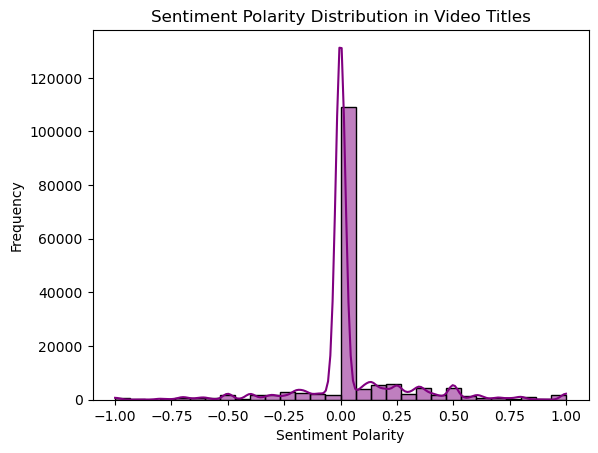

In [12]:

df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

sns.histplot(df['title_sentiment'], bins=30, kde=True, color='purple')
plt.title("Sentiment Polarity Distribution in Video Titles")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


In [ ]:
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['trending_duration'] = (df['trending_date'] - df['publish_date']).dt.days


sns.boxplot(data=df, x='category', y='trending_duration')
plt.xticks(rotation=90)
plt.title("Trending Duration by Category")
plt.show()


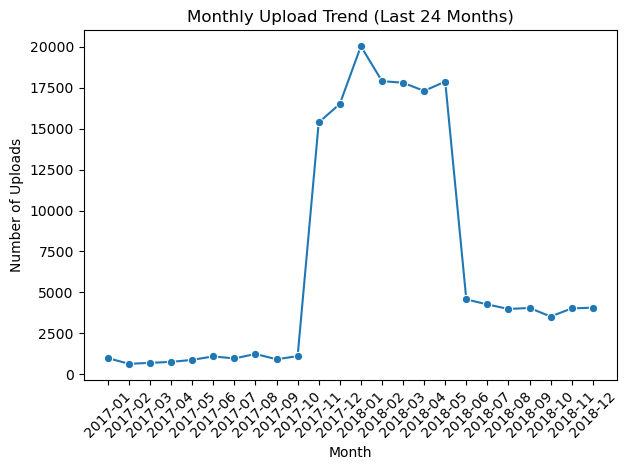

In [14]:
df['month'] = df['publish_date'].dt.to_period('M').astype(str)
monthly_uploads = df.groupby('month').size().reset_index(name='upload_count')


monthly_uploads = monthly_uploads.tail(24)


sns.lineplot(data=monthly_uploads, x='month', y='upload_count', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Upload Trend (Last 24 Months)")
plt.ylabel("Number of Uploads")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


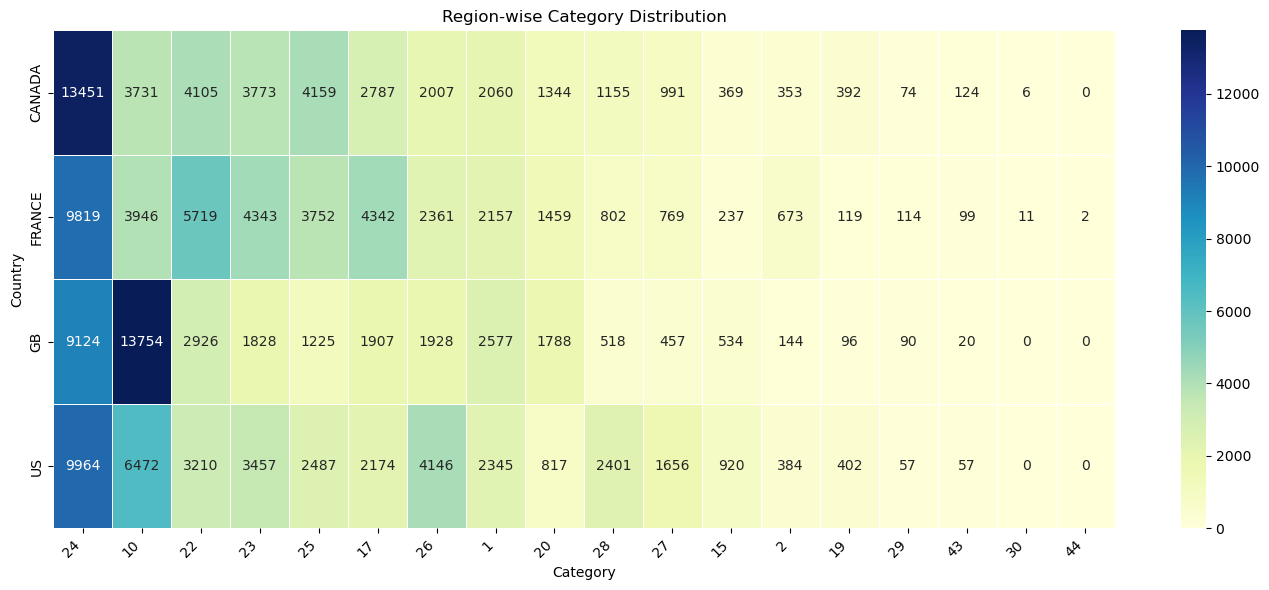

In [20]:

pivot = df.groupby(['publish_country', 'category']).size().unstack(fill_value=0)


pivot = pivot[pivot.sum().sort_values(ascending=False).index]

plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title("Region-wise Category Distribution")
plt.xlabel("Category")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



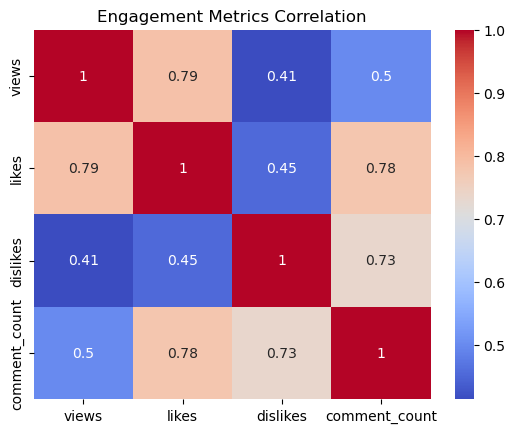

In [21]:
corr = df[['views', 'likes', 'dislikes', 'comment_count']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Engagement Metrics Correlation")
plt.show()


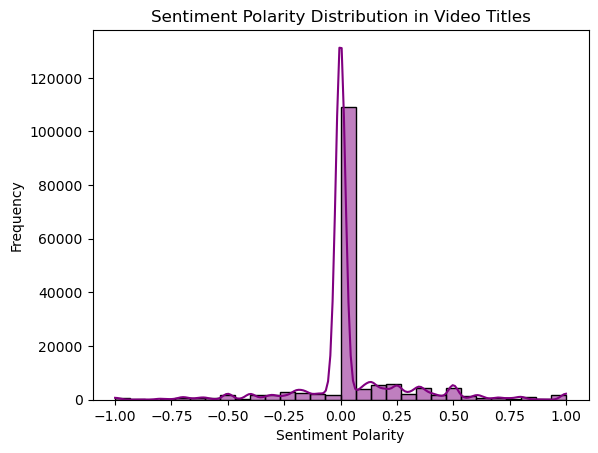

In [16]:

df['title_sentiment_label'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


sns.histplot(df['title_sentiment'], bins=30, kde=True, color='purple')
plt.title("Sentiment Polarity Distribution in Video Titles")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


In [ ]:
conn=psycopg2.connect(host="localhost",database="youtube_trends",user="postgres",password="root",port=5432)
curs=conn.cursor()
print('connected succesfully')

In [12]:
df.columns

Index(['id', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_date', 'time_frame', 'published_day_of_week',
       'publish_country', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_removed', 'category'],
      dtype='object')

                                               title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with J...   
2  Racist Superman | Rudy Mancuso, King Bach & Le...   
3                   Nickelback Lyrics: Real or Fake?   
4                           I Dare You: GOING BALD!?   

                                                tags  title_sentiment  \
0                                    SHANtell martin             0.00   
1  last week tonight trump presidency|"last week ...             0.00   
2  racist superman|"rudy""|""mancuso""|""king""|"...             0.00   
3  rhett and link|"gmm""|""good mythical morning"...            -0.75   
4  ryan|"higa""|""higatv""|""nigahiga""|""i dare ...             0.00   

   tags_sentiment title_sentiment_label tags_sentiment_label  
0        0.000000               Neutral              Neutral  
1        0.000000               Neutral              Neutral  
2        0.111111               Neu

In [13]:
curs.execute("DROP TABLE IF EXISTS youtube;");
conn.commit()
print("Table 'youtube' dropped successfully.")


Table 'youtube' dropped successfully.


In [37]:

curs.execute("""
CREATE TABLE IF NOT EXISTS youtube (
    id serial,
    video_id TEXT UNIQUE,
    trending_date DATE,
    title TEXT,
    channel_title TEXT,
    category_id INTEGER,
    category text,
    publish_date DATE,
    time_frame TEXT,
    published_day_of_week TEXT,
    publish_country TEXT,
    tags TEXT,
    views INTEGER,
    likes INTEGER,
    dislikes INTEGER,
    comment_count INTEGER,
    comments_disabled BOOLEAN,
    ratings_disabled BOOLEAN,
    video_removed BOOLEAN
)
""")
conn.commit()

In [38]:
print(df.columns)


Index(['id', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_date', 'time_frame', 'published_day_of_week',
       'publish_country', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_removed', 'category'],
      dtype='object')


In [39]:
for index, row in df.iterrows():
    try:
        curs.execute("""
            INSERT INTO youtube (
                video_id, trending_date, title, channel_title, category_id, category, publish_date, time_frame, published_day_of_week, publish_country, tags,
                views, likes, dislikes, comment_count, comments_disabled, ratings_disabled, video_removed
            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            ON CONFLICT (video_id) DO UPDATE SET trending_date = EXCLUDED.trending_date;
        """, (
            row['video_id'],
            row['trending_date'],
            row['title'],
            row['channel_title'],
            row['category_id'],
            row['category'], 
            row['publish_date'],
            row['time_frame'],
            row['published_day_of_week'],
            row['publish_country'],
            row['tags'],
            int(row['views']) if not pd.isna(row['views']) else None,
            int(row['likes']) if not pd.isna(row['likes']) else None,
            int(row['dislikes']) if not pd.isna(row['dislikes']) else None,
            int(row['comment_count']) if not pd.isna(row['comment_count']) else None,
            row['comments_disabled'],
            row['ratings_disabled'],
            row['video_removed'] 
        ))
        conn.commit()
    except Exception as e:
        conn.rollback()
        print(f"Row {index} failed: {e}")

if conn:
    conn.close()